In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv") # Loading the dataset

In [3]:
Data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
Data.columns # Checking the columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
Data.shape # checking the total number of rows and columns

(1000, 40)

In [6]:
Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# Dropping c39 as all are null values

In [8]:
Data.drop('_c39',axis=1,inplace=True)

In [9]:
Data.isnull().sum() #Checking for null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
# No null value has been observed

In [11]:
# We have 39 columns, lets see which one is more affected by the target variable (fraud reported)

In [12]:
Data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
Data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

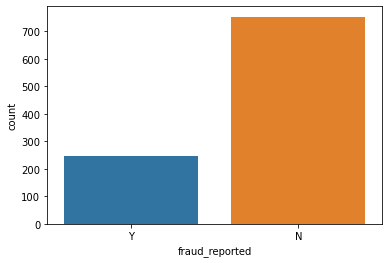

In [14]:
sns.countplot(Data['fraud_reported']) # Plotting the data to see the difference

In [15]:
Data['fraud_reported']=Data['fraud_reported'].replace({'Y':1,'N':0})

Text(0.5, 1.0, 'Fraud Detection on the basis Customer Tenurity')

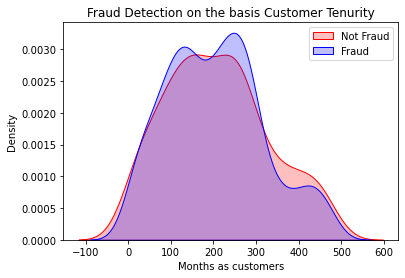

In [16]:
ax = sns.kdeplot(Data.months_as_customer [(Data["fraud_reported"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.months_as_customer[(Data["fraud_reported"] == 0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Fraud","Fraud"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Months as customers')
ax.set_title('Fraud Detection on the basis Customer Tenurity')

In [17]:
# Majority of the fraud is observed between 100-300 months.

Text(0.5, 1.0, 'Fraud Detection on the basis of Customer Age')

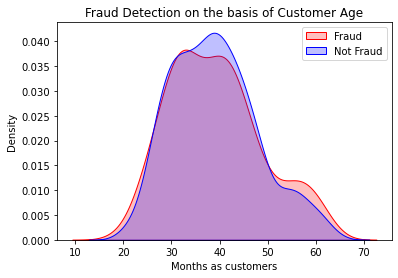

In [18]:
ax = sns.kdeplot(Data.age [(Data["fraud_reported"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.age[(Data["fraud_reported"] == 0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Fraud","Not Fraud"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Months as customers')
ax.set_title('Fraud Detection on the basis of Customer Age')

In [19]:
# Majority of the fraud is done between age group 30-40 years

In [20]:
Data.policy_csl.unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

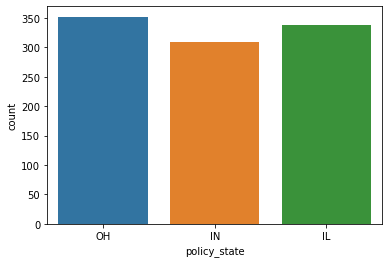

In [21]:
sns.countplot(Data['policy_state'])

<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

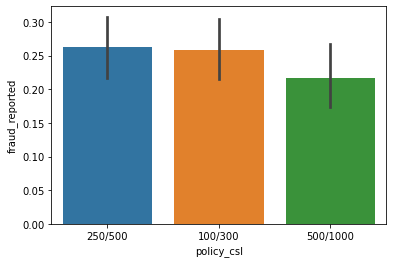

In [22]:
sns.barplot(x='policy_csl',y='fraud_reported',data=Data)

In [23]:
# Policy CSL between 250/500 and 100/300 has more chances of fraud

In [24]:
Data.drop('policy_bind_date',axis=1,inplace=True) # dropping date

In [25]:
Data.policy_deductable.unique()

array([1000, 2000,  500], dtype=int64)

In [26]:
Data.policy_deductable.value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

Text(0.5, 1.0, 'Fraud Detection on Policy Deductable')

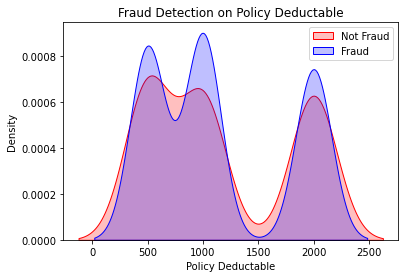

In [27]:
ax = sns.kdeplot(Data.policy_deductable [(Data["fraud_reported"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.policy_deductable[(Data["fraud_reported"] == 0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Fraud","Fraud"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Policy Deductable')
ax.set_title('Fraud Detection on Policy Deductable')

In [28]:
Data.policy_annual_premium.unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

Text(0.5, 1.0, 'Fraud Detection on Annual Policy')

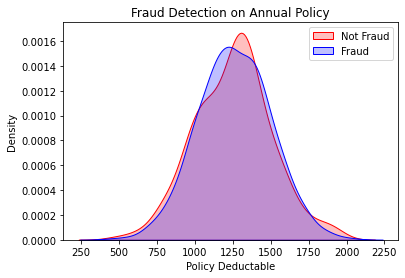

In [29]:
ax = sns.kdeplot(Data.policy_annual_premium[(Data["fraud_reported"] == 1) ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.policy_annual_premium[(Data["fraud_reported"] == 0) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Fraud","Fraud"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Policy Deductable')
ax.set_title('Fraud Detection on Annual Policy')

In [30]:
# Majority of the fraud takes place in annual policy 1100 to 1300

In [31]:
Data.umbrella_limit.unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [32]:
Data.insured_zip.unique() 

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [33]:
Data.drop('insured_zip',axis=1,inplace=True) #Dropping the zip code

In [34]:
Data.insured_education_level.unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

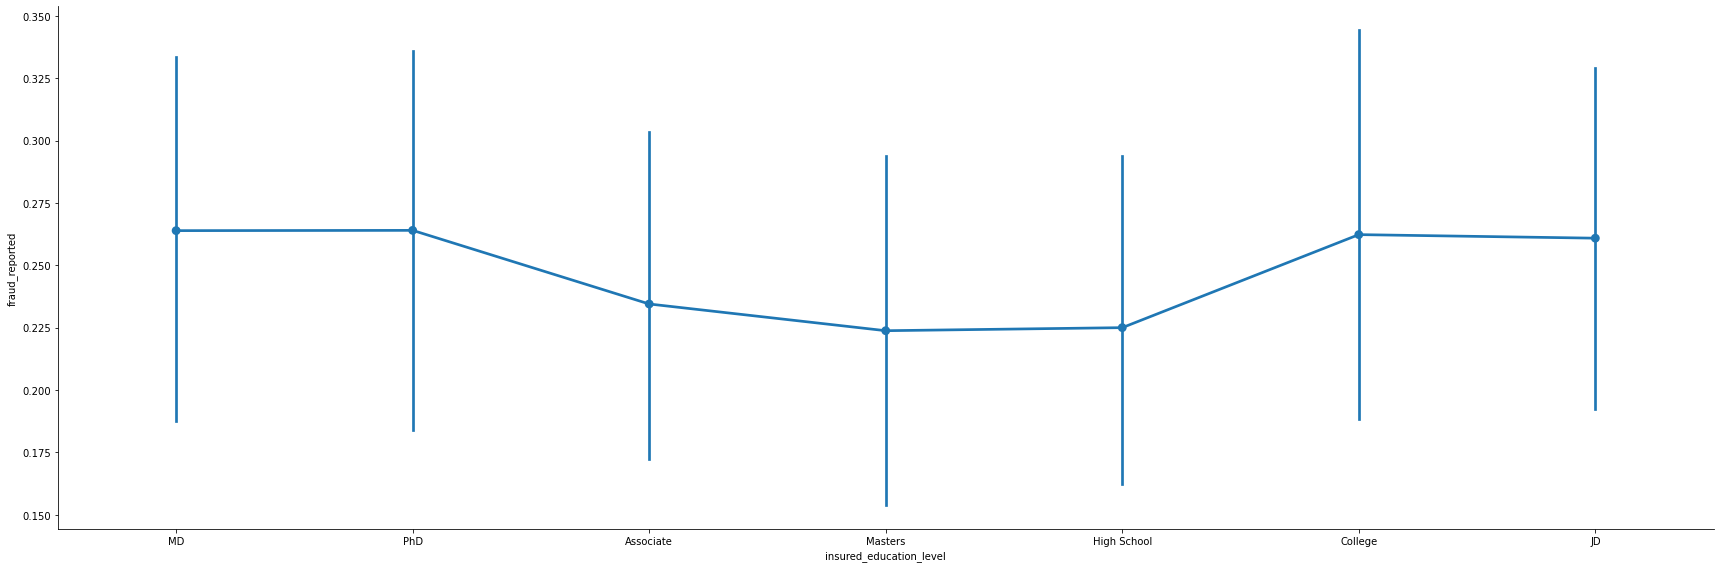

In [35]:
sns.catplot(x='insured_education_level',y='fraud_reported',data=Data,kind='point',height=8,aspect=3)

In [36]:
# Majority fraud is observed in college and PHD level

In [37]:
Data.insured_occupation.unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

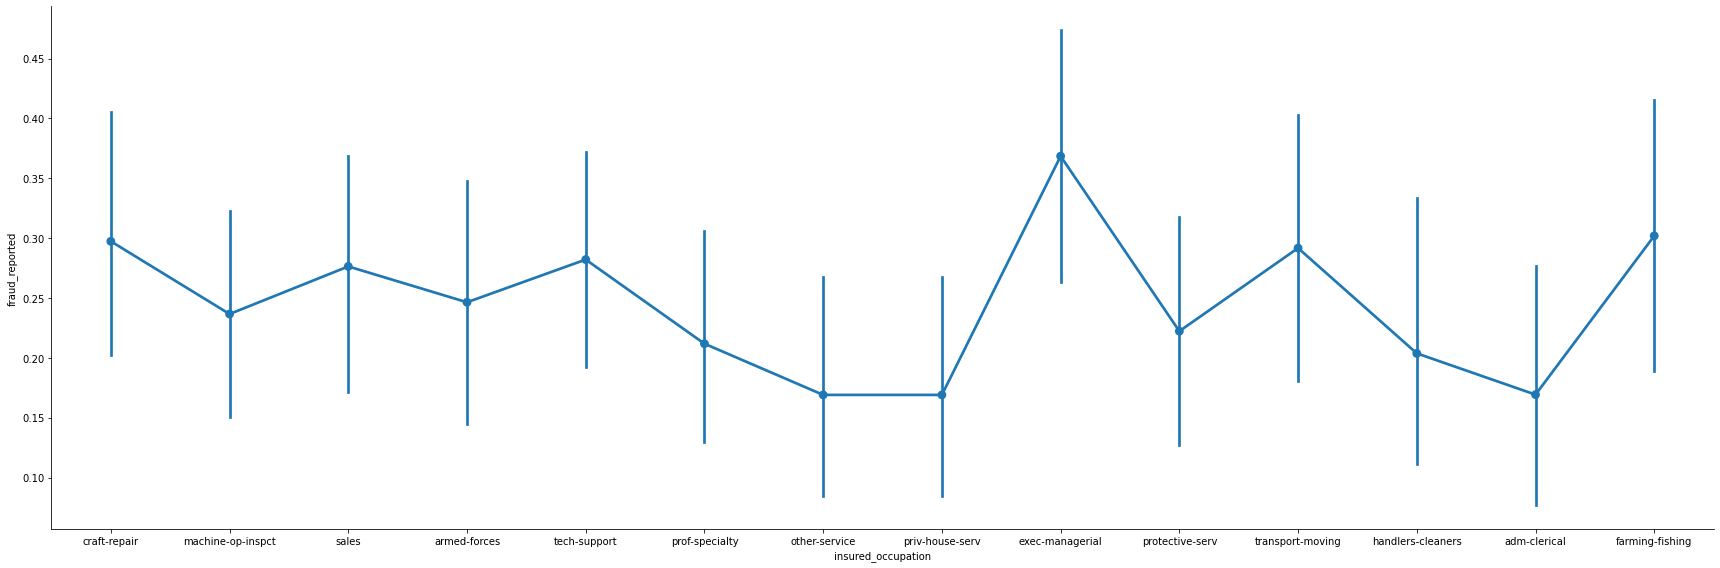

In [38]:
sns.catplot(x='insured_occupation',y='fraud_reported',data=Data,kind='point',height=8,aspect=3)

In [39]:
# More fruad is observed in exec managerial and farming and fishing

In [40]:
Data.insured_hobbies.unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [41]:
Data.insured_relationship.unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

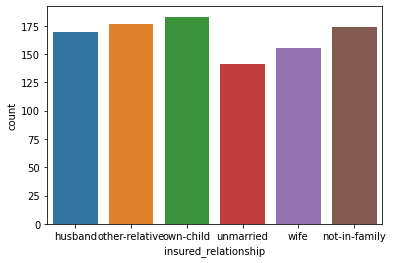

In [42]:
sns.countplot(Data.insured_relationship)

In [43]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [44]:
enc= LabelEncoder() #Encoding the object data type

In [45]:
columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','police_report_available','auto_make','auto_model']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [46]:
Data.drop(['policy_number','insured_hobbies','incident_date','incident_state','incident_city','incident_location','auto_year'],axis=1,inplace=True)# Dropping few unnecessary columns

In [47]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_occupation           1000 non-null   int32  
 10  insured_relationship         1000 non-null   int32  
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

<AxesSubplot:>

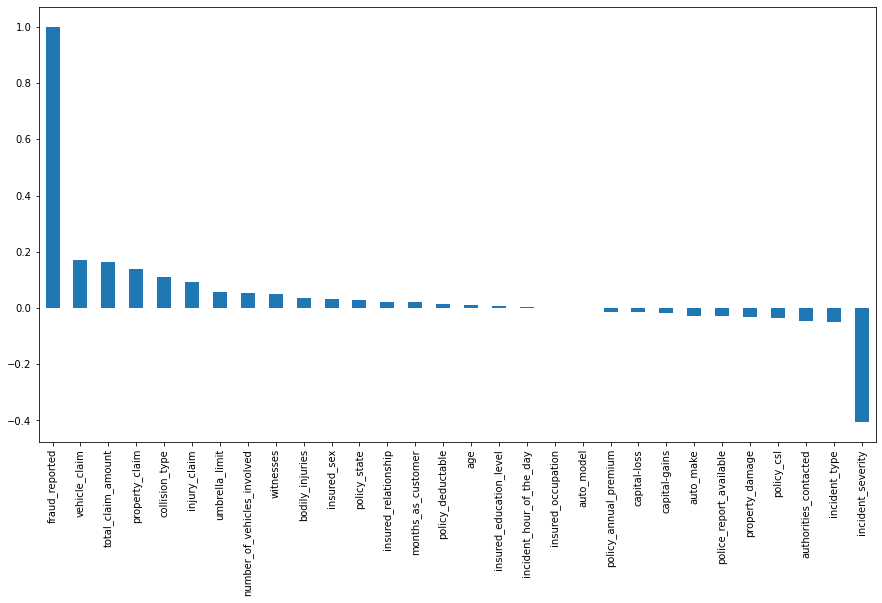

In [48]:
# getting corelation of all the above  data with Fraud reporting
plt.figure(figsize=(15,8))
Data.corr()['fraud_reported'].sort_values(ascending = False).plot(kind='bar')

In [49]:
# Fraud reported is positively related to Vehicle claim, Total claim amount, property type, however in terms of incident severity and incident type its negatively related

In [50]:
Data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [51]:
# The above data shows an imbalanced class which might make the model biased

In [52]:
from sklearn.utils import resample

In [53]:
not_fraud=Data[Data.fraud_reported==0]
fraud=Data[Data.fraud_reported==1]

In [54]:
fraud_upsamples=resample(fraud,replace=True,n_samples=len(not_fraud),random_state=27)

In [55]:
upsampled=pd.concat([not_fraud,fraud_upsamples])

In [56]:
Data=upsampled

In [57]:
Data['fraud_reported'].value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

In [58]:
# Class has now been balanced

In [59]:
Data.shape #checking the shape

(1506, 30)

In [60]:
Data.reset_index(drop=True, inplace=True)

In [61]:
Data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1.506000e+03,1506.000000,1506.000000,1506.000000,...,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,205.587649,39.055113,1.030544,0.931607,1152.390438,1245.178187,1.195883e+06,0.467463,2.990040,6.580345,...,1.028552,1.496016,0.972776,55043.798141,7770.969456,7696.122178,39576.706507,6.361222,19.250332,0.500000
std,116.678571,9.378792,0.822683,0.797819,618.795526,243.855797,2.375570e+06,0.499106,1.911471,4.053691,...,0.821542,1.101638,0.803598,24991.363027,4809.709987,4737.746675,17889.351729,4.006763,11.163259,0.500166
min,0.000000,19.000000,0.000000,0.000000,500.000000,433.330000,-1.000000e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000
25%,112.000000,32.000000,0.000000,0.000000,500.000000,1079.920000,0.000000e+00,0.000000,1.000000,3.000000,...,0.000000,1.000000,0.000000,46200.000000,4800.000000,4990.000000,33187.500000,3.000000,10.000000,0.000000
50%,203.000000,38.000000,1.000000,1.000000,1000.000000,1257.595000,0.000000e+00,0.000000,3.000000,6.000000,...,1.000000,2.000000,1.000000,59070.000000,6995.000000,6935.000000,42770.000000,6.000000,20.000000,0.500000
75%,279.000000,45.000000,2.000000,2.000000,2000.000000,1398.262500,0.000000e+00,1.000000,5.000000,10.000000,...,2.000000,2.000000,2.000000,71515.000000,11455.000000,11040.000000,51280.000000,10.000000,29.000000,1.000000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,...,2.000000,3.000000,2.000000,114920.000000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000


In [62]:
# There is a difference in mean and std in all the columns

In [63]:
X=Data.drop('fraud_reported',axis=1)
Y=Data['fraud_reported'] #Seperating the target and classes

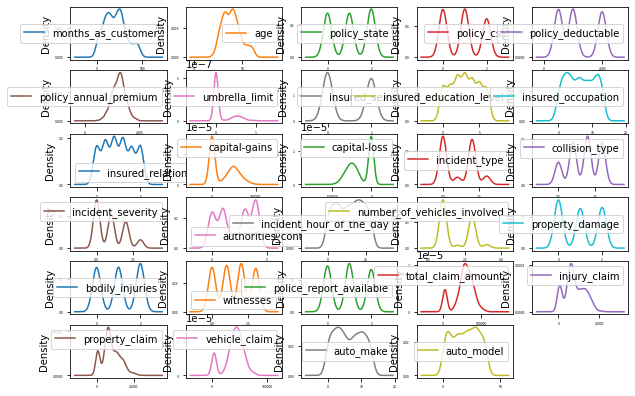

In [64]:
X.plot(kind='kde',subplots=True,layout=(7,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [65]:
# Data is skewed

In [66]:
X.skew().sort_values(ascending=False) #Checking the skewness

umbrella_limit                 1.704299
incident_severity              0.571198
capital-gains                  0.522052
age                            0.471231
number_of_vehicles_involved    0.432016
policy_deductable              0.425662
property_claim                 0.375428
months_as_customer             0.344820
injury_claim                   0.223948
insured_sex                    0.130553
policy_csl                     0.123201
incident_type                  0.123183
property_damage                0.110639
auto_make                      0.061874
insured_relationship           0.055716
police_report_available        0.049242
insured_occupation             0.026873
insured_education_level       -0.000066
witnesses                     -0.003319
incident_hour_of_the_day      -0.046424
bodily_injuries               -0.052848
auto_model                    -0.056468
policy_state                  -0.056616
policy_annual_premium         -0.062523
authorities_contacted         -0.111648


In [67]:
from sklearn.preprocessing import power_transform

In [68]:
New_X=power_transform(X)

In [69]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

number_of_vehicles_involved    0.281376
capital-loss                   0.141917
insured_sex                    0.130553
capital-gains                  0.059535
incident_severity              0.042774
policy_deductable              0.012003
policy_annual_premium          0.001163
age                           -0.003146
incident_type                 -0.057011
property_damage               -0.081895
policy_csl                    -0.088328
police_report_available       -0.116912
months_as_customer            -0.144087
bodily_injuries               -0.157316
policy_state                  -0.158932
witnesses                     -0.160314
insured_relationship          -0.160417
insured_education_level       -0.179801
collision_type                -0.190473
auto_make                     -0.198945
insured_occupation            -0.206305
authorities_contacted         -0.224417
incident_hour_of_the_day      -0.264941
auto_model                    -0.267421
property_claim                -0.356290


In [70]:
X=pd.DataFrame(New_X,columns=X.columns)

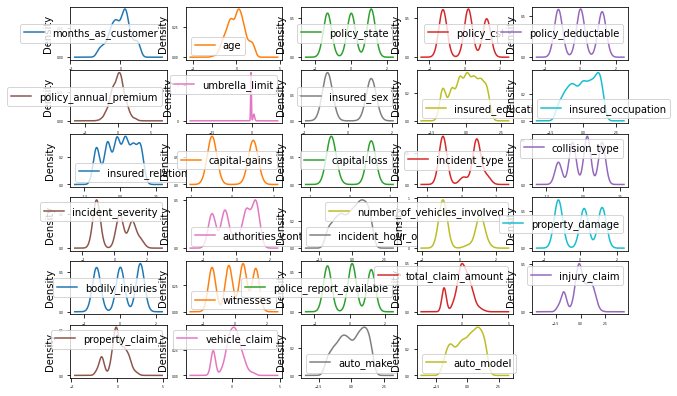

In [71]:
X.plot(kind='kde',subplots=True,layout=(7,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # checking data after transformation

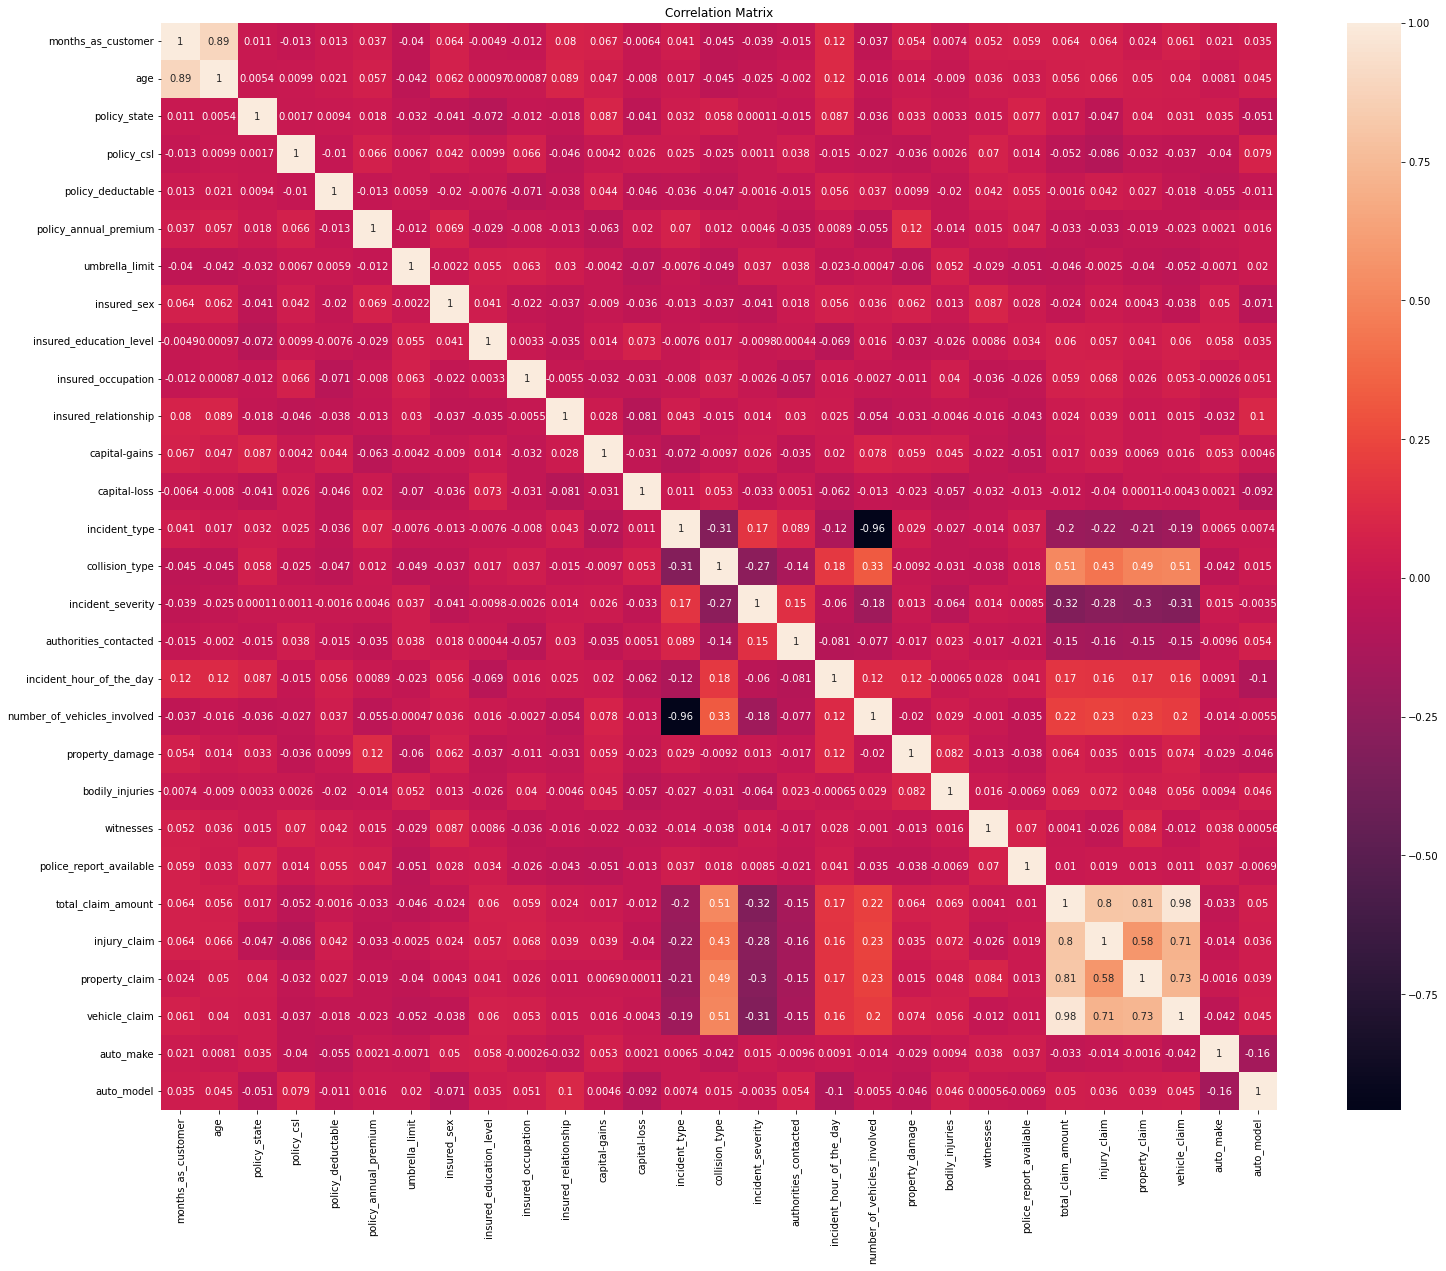

In [72]:
corr_mat=X.corr()
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation of the feature variables

In [73]:
# As the number of columns are more, so its better to measure multicollinearity by VIF

In [74]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,months_as_customer,5.020099
1,age,4.999197
2,policy_state,1.054206
3,policy_csl,1.045256
4,policy_deductable,1.042117
5,policy_annual_premium,1.057564
6,umbrella_limit,1.035655
7,insured_sex,1.061140
8,insured_education_level,1.039217
9,insured_occupation,1.036939


In [75]:
# Injury claim, property claim and vehicle claim leads to total claim amount
# Both VIF and heat map shows total claim with huge multicolinearity values
# Therefore dropping Total Claim

In [76]:
X.drop('total_claim_amount',axis=1,inplace=True)

In [77]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,months_as_customer,5.018622
1,age,4.989849
2,policy_state,1.054049
3,policy_csl,1.042801
4,policy_deductable,1.039999
5,policy_annual_premium,1.049969
6,umbrella_limit,1.033851
7,insured_sex,1.059558
8,insured_education_level,1.038964
9,insured_occupation,1.033626


In [78]:
# Dropping Incident type due to high VIF and also its one of the features with least relationship with Fraud

In [79]:
X.drop('incident_type',axis=1,inplace=True)

In [80]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,months_as_customer,5.015302
1,age,4.987521
2,policy_state,1.053975
3,policy_csl,1.042768
4,policy_deductable,1.039999
5,policy_annual_premium,1.046502
6,umbrella_limit,1.033098
7,insured_sex,1.053628
8,insured_education_level,1.038276
9,insured_occupation,1.032611


In [81]:
# No multicolinearity issue found now

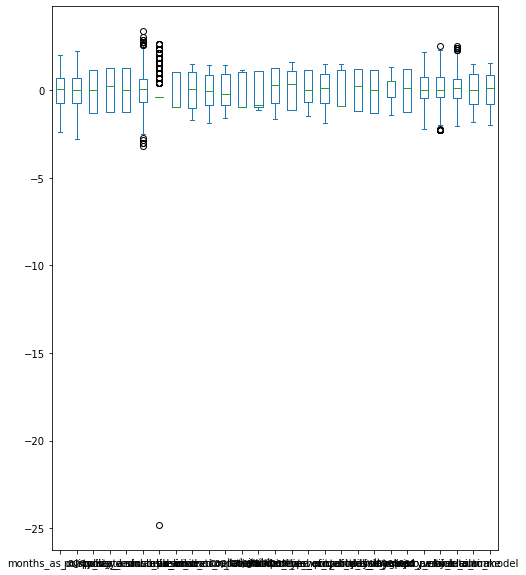

In [82]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [83]:
from scipy.stats import zscore

In [84]:
(np.abs(zscore(X)<3)).all() #checking the presence of any Outlier with zscore

months_as_customer              True
age                             True
policy_state                    True
policy_csl                      True
policy_deductable               True
policy_annual_premium          False
umbrella_limit                  True
insured_sex                     True
insured_education_level         True
insured_occupation              True
insured_relationship            True
capital-gains                   True
capital-loss                    True
collision_type                  True
incident_severity               True
authorities_contacted           True
incident_hour_of_the_day        True
number_of_vehicles_involved     True
property_damage                 True
bodily_injuries                 True
witnesses                       True
police_report_available         True
injury_claim                    True
property_claim                  True
vehicle_claim                   True
auto_make                       True
auto_model                      True
d

In [85]:
# Policy annual premium has Outliers

In [86]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([ 167,  181,  208,  552,  869, 1239], dtype=int64),
 array([5, 5, 6, 5, 5, 5], dtype=int64))

In [87]:
New_X = X[(np.abs(zscore(X))<3).all(axis=1)]
New_X

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,-0.516476,-1.116679,1.144758,-1.227246,1.245900,0.685069,1.296058,-0.936913,1.486203,1.058797,...,1.127205,0.216690,1.147979,1.300195,0.135709,0.137853,-0.686553,-0.992459,-0.494810,0.948123
1,0.288755,0.607927,-1.287233,1.253529,0.032277,1.400509,1.573669,1.067335,-1.673388,1.058797,...,-0.882331,0.216690,-1.287153,-0.377640,0.135709,-1.421648,-1.729852,-1.873173,-1.827674,1.024811
2,-0.488270,-0.467714,0.034417,0.212714,0.032277,0.353712,-0.376330,1.067335,1.486203,0.637695,...,1.127205,-1.189147,-1.287153,-1.423781,-1.261046,2.169330,0.038476,0.578251,0.696095,0.870824
3,-0.234355,-0.118150,-1.287233,-1.227246,0.032277,-0.452836,-0.376330,1.067335,-1.673388,1.261198,...,1.127205,-1.189147,1.147979,0.506769,1.216776,0.437927,0.454125,-0.453482,-1.420951,-1.299042
4,-1.764613,-0.590373,-1.287233,-1.227246,-1.217237,0.809525,-0.376330,-0.936913,1.486203,0.189862,...,-0.882331,0.216690,0.037657,-0.377640,1.216776,-0.953547,-0.973701,-1.042406,1.311480,-0.868124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,-2.126145,-0.348233,1.144758,-1.227246,1.245900,0.079356,-0.376330,1.067335,1.033726,1.058797,...,1.127205,0.216690,0.037657,1.300195,1.216776,1.523903,0.732255,0.206072,-0.232843,-0.478765
1502,1.096304,0.887726,1.144758,0.212714,1.245900,0.989473,-0.376330,-0.936913,-1.673388,-1.461466,...,1.127205,0.216690,1.147979,1.300195,-1.261046,0.992648,-0.110245,0.258994,-0.494810,0.948123
1503,-0.305298,-0.845967,0.034417,1.253529,-1.217237,0.041925,1.844045,1.067335,-0.456876,-0.554131,...,1.485541,0.216690,1.147979,0.506769,0.135709,-0.457281,0.482381,-0.421368,-1.827674,1.176450
1504,0.497405,0.510843,0.034417,1.253529,-1.217237,-1.071860,-0.376330,-0.936913,0.068370,1.458895,...,0.493309,-1.189147,1.147979,0.506769,-1.261046,0.094839,1.349282,0.718416,0.696095,0.635003


In [88]:
New_X.shape # Checking the shape of X and Y after removing Outliers

(1500, 27)

In [89]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0       0
1       0
2       0
3       0
4       0
       ..
1501    1
1502    1
1503    1
1504    1
1505    1
Name: fraud_reported, Length: 1500, dtype: int64

In [90]:
Scalar=StandardScaler() #scaling the data

In [91]:
X_Scaled=Scalar.fit_transform(New_X)
#scaling the features

# Logistic Regression

In [92]:
LR=LogisticRegression()

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test) # Testing the prediction of test data

In [94]:
LR_accuracy=accuracy_score(y_test,pred_test)*100
LR_accuracy

74.0

In [95]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[109,  35],
       [ 43, 113]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report

In [97]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       144
           1       0.76      0.72      0.74       156

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Decision Tree

In [98]:
DT=DecisionTreeClassifier()

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test) # Testing the prediction of test data

In [100]:
DT_accuracy=accuracy_score(y_test,pred_test)*100
DT_accuracy

87.33333333333333

In [101]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[115,  29],
       [  9, 147]], dtype=int64)

In [102]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       144
           1       0.84      0.94      0.89       156

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



#  Random Forest

In [103]:
RF=RandomForestClassifier()

In [104]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test) # Testing the prediction of test data

In [105]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

92.33333333333333

In [106]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[128,  16],
       [  7, 149]], dtype=int64)

In [107]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       144
           1       0.90      0.96      0.93       156

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Gradient Boost

In [108]:
GB=GradientBoostingClassifier()

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test) # Testing the prediction of test data

In [110]:
GB_accuracy=accuracy_score(y_test,pred_test)*100
GB_accuracy

86.33333333333333

In [111]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[125,  19],
       [ 22, 134]], dtype=int64)

In [112]:
print (classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       144
           1       0.88      0.86      0.87       156

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



# Cross Validation for LR

In [113]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.7453333333333333
The cross validation score for 3 is 0.7493333333333334
The cross validation score for 4 is 0.7546666666666667
The cross validation score for 5 is 0.7546666666666667


# Cross Validation for DT

In [114]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean())

The cross validation score for 2 is 0.8053333333333333
The cross validation score for 3 is 0.848
The cross validation score for 4 is 0.8546666666666667
The cross validation score for 5 is 0.8646666666666667


# Cross Validation for RF

In [115]:
for i in range(2,6):
    RF_Val=cross_val_score(RF,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean())

The cross validation score for 2 is 0.8786666666666667
The cross validation score for 3 is 0.906
The cross validation score for 4 is 0.9113333333333333
The cross validation score for 5 is 0.9146666666666666


# Cross Validation for GB

In [116]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.8446666666666667
The cross validation score for 3 is 0.8486666666666666
The cross validation score for 4 is 0.8513333333333334
The cross validation score for 5 is 0.8573333333333334


## Conclusion: Looking at the accuracy and cross validation score, Random Forest Classifier is the best model for this dataset.

# Hypertuning Parameter

In [117]:
rcf=RandomForestClassifier()

In [118]:
parameters={'criterion':["entropy","ginny"],'max_depth':(list(range(5,15))),'min_samples_split':(list(range(2,4))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(rcf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'ginny'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [2], 'min_samples_split': [2, 3]})

In [119]:
clf.best_params_ #taking the best parameters

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [120]:
rcf=RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_leaf=2,min_samples_split=3,random_state=58)
rcf.fit(X_train,y_train) # Training the model with the best parameters
pred_test=rcf.predict(X_test) # Testing the prediction 

In [121]:
RCF_accuracy=accuracy_score(y_test,pred_test)*100
RCF_accuracy

91.33333333333333

In [122]:
# Accuracy got reduced, therefore trying with few more parameters

In [123]:
rcf=RandomForestClassifier(max_depth=15,min_samples_leaf=2,min_samples_split=3,random_state=58)
rcf.fit(X_train,y_train) # Training the model few more parameters parameters
pred_test=rcf.predict(X_test) # Testing the prediction 

In [124]:
RCF_accuracy=accuracy_score(y_test,pred_test)*100
RCF_accuracy

92.66666666666666

In [125]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[128,  16],
       [  6, 150]], dtype=int64)

In [126]:
# Accuracy increased

# Saving the model

In [127]:
import pickle
filename='Insurance Claims Fraud Detection.pkl'
pickle.dump(rcf,open(filename,'wb')) ##saving the model